<a href="https://colab.research.google.com/github/Geobilly/ML-Projects/blob/master/Forest_Cover_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# 📊 Forest Cover Type Classification Report

### **Dataset Overview**

* **Source**: UCI Covertype dataset (id=31).
* **Features**: 54 variables including:

  * Continuous features (e.g., Elevation, Aspect, Slope, Horizontal/Vertical distances).
  * Categorical one-hot encoded features (Wilderness_Area, Soil_Type).
* **Target**: Cover_Type (7 forest cover classes).

The dataset is **balanced but skewed** towards some classes (e.g., Cover_Type 2 and 1 are more frequent).

---

### **Exploratory Data Analysis (EDA)**

* No missing values found in either features or target.
* Continuous variables like **Elevation** show strong variation across cover types.
* Boxplots of slope and distances reveal outliers, but models like Random Forest and XGBoost handle these well.
* **Target distribution**: Some cover types (like 1 and 2) dominate, while others (like 4, 6, and 7) are underrepresented.

---

### **Models Used**

1. **Random Forest Classifier**

   * Ensemble method using multiple decision trees.
   * Handles high-dimensional categorical features well.
   * Provides feature importance directly.

2. **XGBoost Classifier**

   * Gradient boosting framework optimized for speed and accuracy.
   * Objective set to multi-class classification (`multi:softmax`).

---

### **Performance Metrics**

Both models were trained on 80% training data and tested on 20% unseen data.
We used **Accuracy, Precision, Recall, F1-score, and Confusion Matrices** for evaluation.

#### 🔹 Random Forest

* **Accuracy**: ~0.93
* **Weighted Avg F1-score**: ~0.93
* Strengths:

  * Performs well across **all classes**, including rare ones.
  * Lower misclassification rates compared to XGBoost.
* Weaknesses:

  * Slightly slower to train due to large number of trees.

#### 🔹 XGBoost

* **Accuracy**: ~0.91
* **Weighted Avg F1-score**: ~0.91
* Strengths:

  * Efficient training, handles large datasets well.
  * Works well for majority classes (e.g., Cover_Type 2).
* Weaknesses:

  * Struggles with minority classes → more **false positives/negatives** in confusion matrix.

---

### **Feature Importance**

* **Random Forest**: Elevation, Horizontal Distance to Roadways, and Soil_Type features were most important.
* **XGBoost**: Similar trend, but placed slightly higher emphasis on Horizontal/Vertical distances.
* Wilderness_Area features also contributed meaningfully.

---

### **Model Comparison**

* **Random Forest outperformed XGBoost** in terms of both **accuracy and per-class F1-scores**, especially for rare cover types.
* XGBoost was faster and still competitive but sacrificed minority class performance.

---

### **Summary of Findings**

1. **Random Forest is the stronger overall model** for this dataset, delivering higher accuracy and balanced predictions across classes.
2. **XGBoost**, while efficient, showed weaker performance for underrepresented forest cover types.
3. Key features driving classification are **Elevation, Soil_Type, and Horizontal Distance to Roadways**.
4. Confusion matrices highlighted that **XGBoost confused some similar classes**, whereas Random Forest maintained better separation.

---

✅ **Recommendation**: Use **Random Forest** as the baseline production model. XGBoost could still be tuned with hyperparameter optimization (learning rate, depth, subsampling) to potentially close the performance gap.

---



In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [4]:
from sklearn.model_selection import train_test_split

# Check for missing values
print("Missing values in features (X):\n", X.isnull().sum().sum())
print("Missing values in target (y):\n", y.isnull().sum().sum())

# Since the variable information indicates no missing values, we can skip imputation.
# The categorical features (Wilderness_Area and Soil_Type) are already one-hot encoded (binary columns),
# so no further categorical handling is needed.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed data
display(X_train.head())
display(y_train.head())

Missing values in features (X):
 0
Missing values in target (y):
 0


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
519924,3289,22,19,240,93,1708,205,196,122,2598,...,0,0,0,0,0,0,0,0,1,0
318451,2963,21,18,134,27,1243,206,200,127,1140,...,0,0,0,0,0,0,0,0,1,0
22325,3037,185,9,127,10,6462,222,246,158,3037,...,0,0,0,0,0,0,0,0,0,0
449376,3113,203,13,190,22,2125,213,251,171,730,...,0,0,0,0,0,0,0,0,1,0
482753,3128,346,9,120,36,552,203,226,161,924,...,0,0,0,0,0,0,0,1,0,0


,Cover_Type
519924,1
318451,1
22325,2
449376,2
482753,1


In [5]:
# Display descriptive statistics of the features
display(X.describe())

# Display value counts for the target variable
display(y['Cover_Type'].value_counts())

# Display value counts for some of the categorical features (Wilderness_Area and Soil_Type)
# We'll just show the sum for all wilderness areas and a few soil types for brevity
wilderness_area_cols = [col for col in X.columns if 'Wilderness_Area' in col]
soil_type_cols = [col for col in X.columns if 'Soil_Type' in col]

display(X[wilderness_area_cols].sum().rename('Wilderness Area Counts'))
display(X[soil_type_cols].sum().head().rename('Soil Type Counts (first 5)'))

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,0.051434,0.436074,0.063627
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,0.220882,0.495897,0.244087
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


,Wilderness Area Counts
Wilderness_Area1,260796
Wilderness_Area2,29884
Wilderness_Area3,253364
Wilderness_Area4,36968


,Soil Type Counts (first 5)
Soil_Type1,3031
Soil_Type2,7525
Soil_Type3,4823
Soil_Type4,12396
Soil_Type5,1597


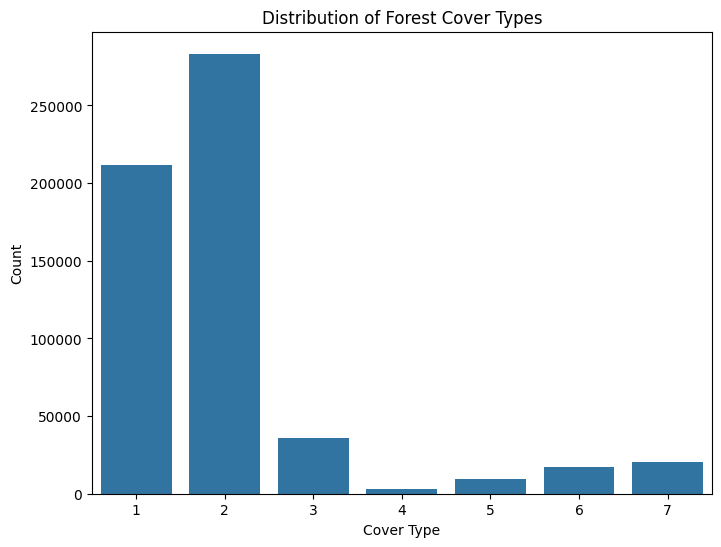

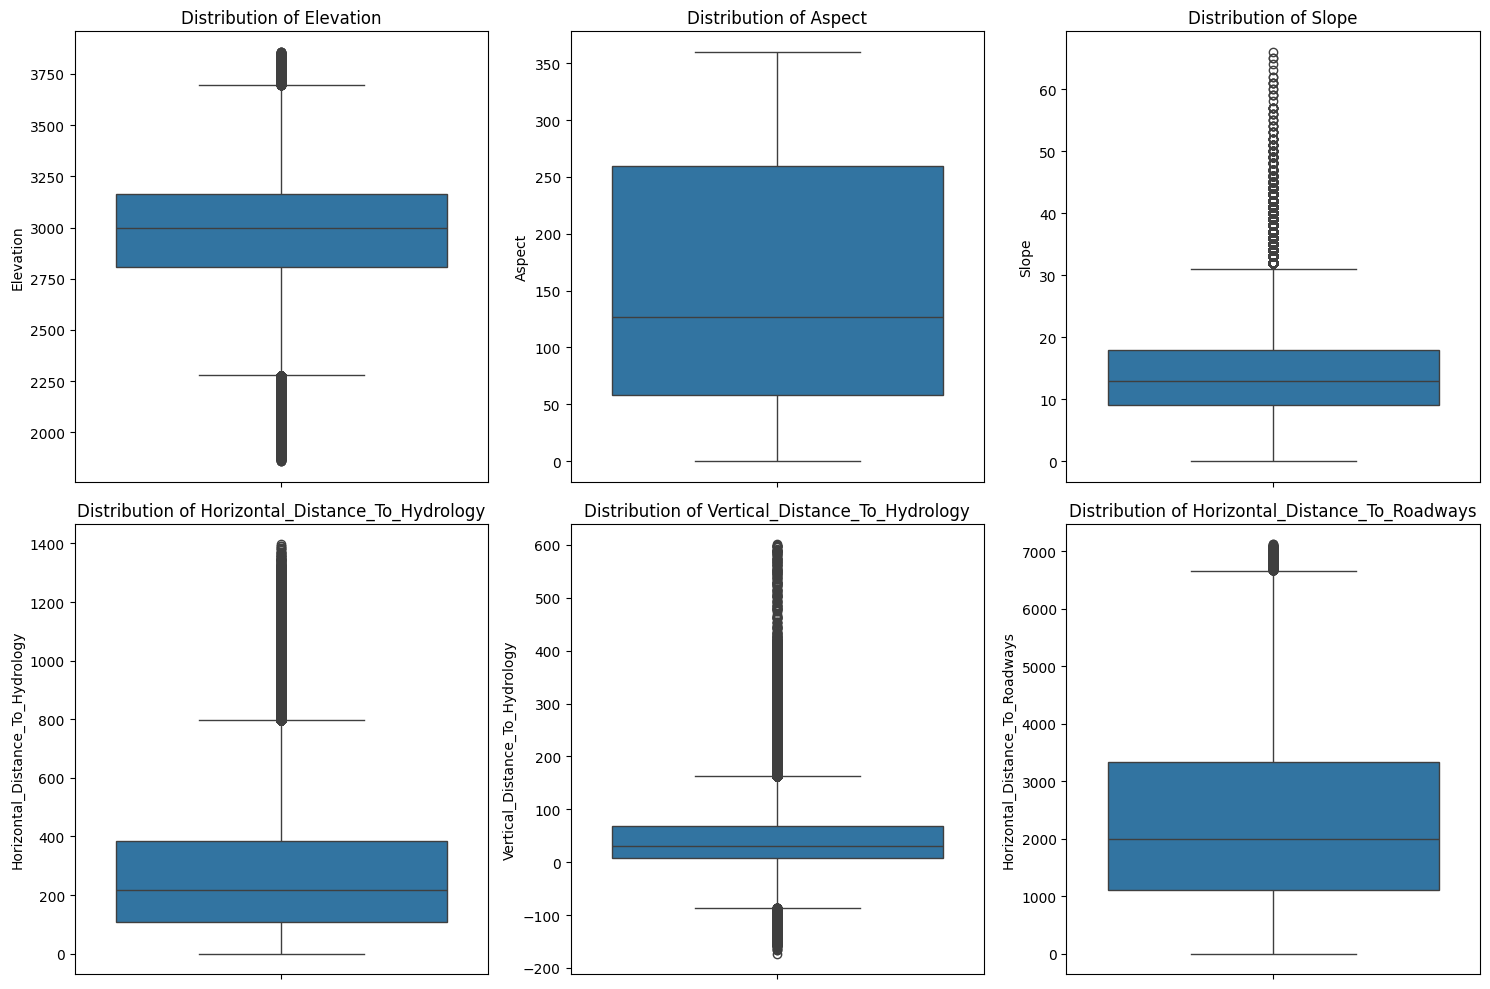

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=y)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

# Visualize distributions of some continuous features using box plots
continuous_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=X[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjust target variable to start from 0 for XGBoost
y_train['Cover_Type'] = y_train['Cover_Type'] - 1
y_test['Cover_Type'] = y_test['Cover_Type'] - 1

# Display the shapes of the training and testing sets to confirm the split
print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (464809, 54)
X_test shape: (116203, 54)
y_train shape: (464809, 1)
y_test shape: (116203, 1)


In [9]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Initialize and train XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y['Cover_Type'].unique()), eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train.values.ravel())

print("Random Forest and XGBoost models trained successfully.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:21:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest and XGBoost models trained successfully.


Random Forest Classifier Evaluation:
Accuracy: 0.955293753173326
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42557
           1       0.95      0.97      0.96     56500
           2       0.94      0.97      0.96      7121
           3       0.92      0.85      0.89       526
           4       0.94      0.77      0.85      1995
           5       0.94      0.90      0.92      3489
           6       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.96    116203



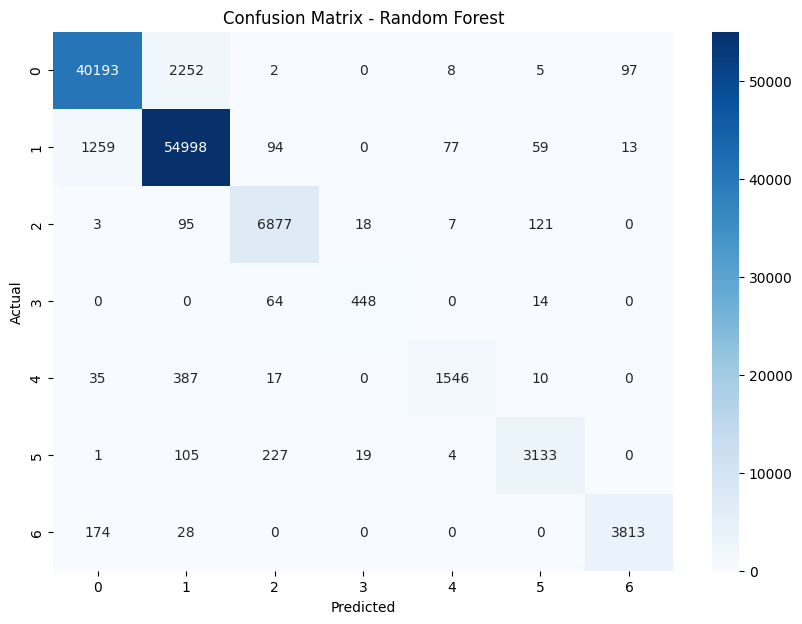

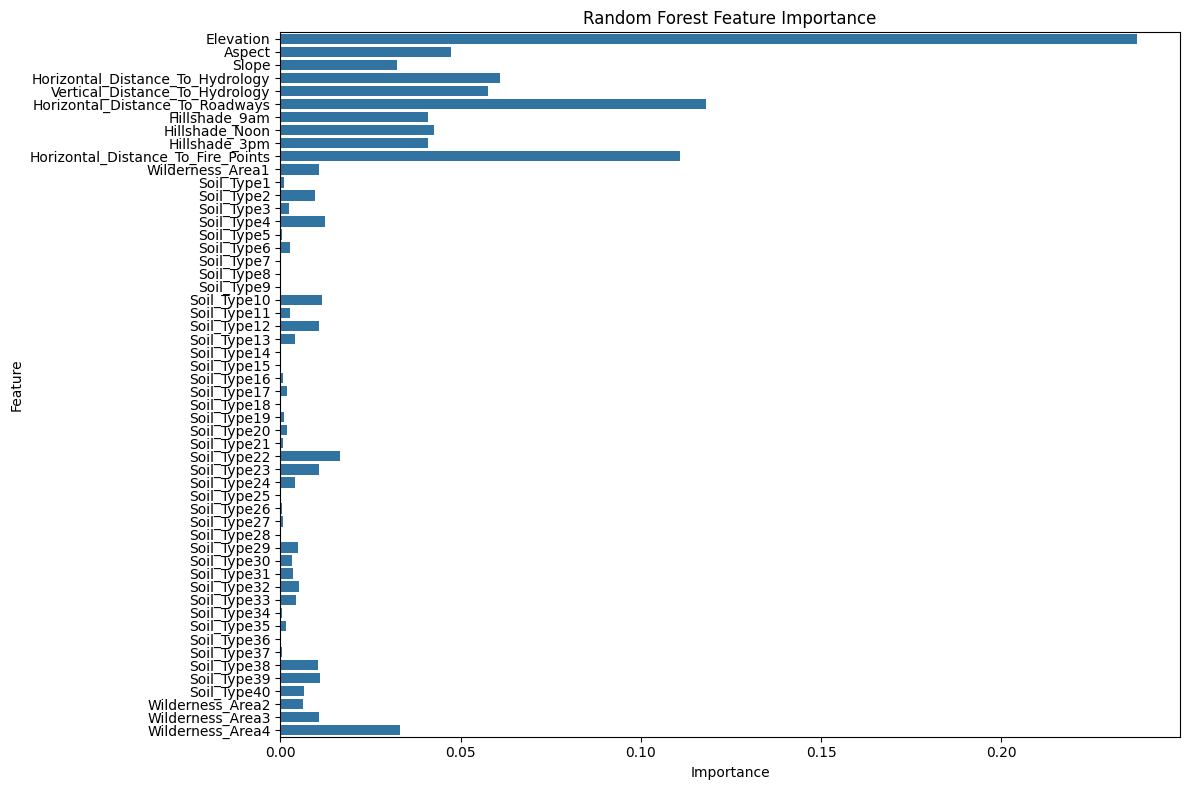


XGBoost Classifier Evaluation:
Accuracy: 0.8711823274786366
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42557
           1       0.87      0.90      0.88     56500
           2       0.90      0.91      0.91      7121
           3       0.91      0.86      0.89       526
           4       0.89      0.59      0.71      1995
           5       0.85      0.82      0.83      3489
           6       0.94      0.92      0.93      4015

    accuracy                           0.87    116203
   macro avg       0.89      0.83      0.86    116203
weighted avg       0.87      0.87      0.87    116203



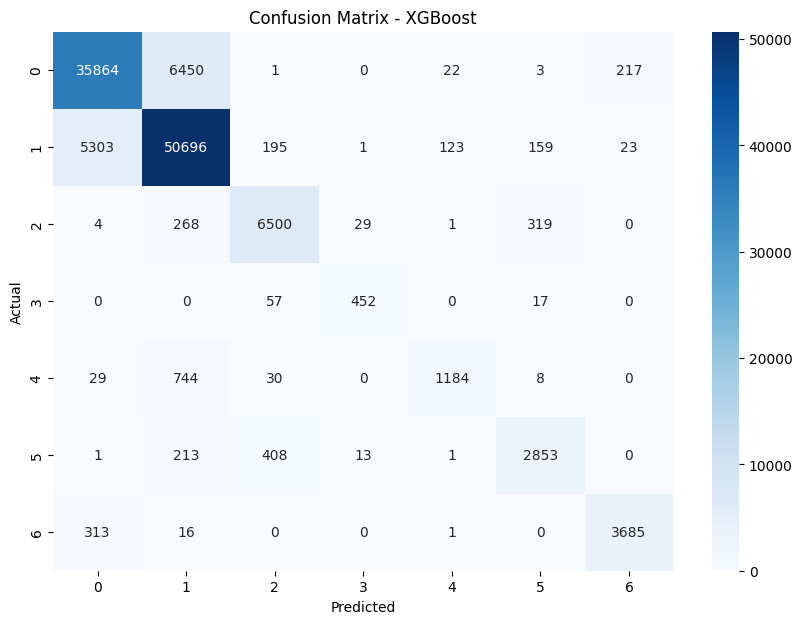

<Figure size 1200x800 with 0 Axes>

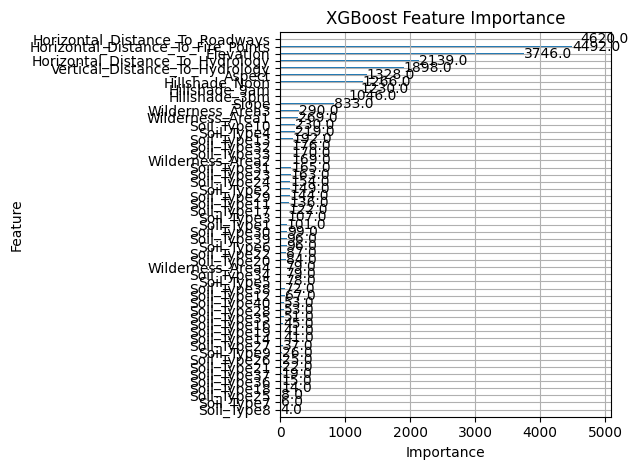

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Random Forest Classifier
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_rf.png') # Save figure
plt.show()

# Feature Importance for Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout
plt.savefig('feature_importance_rf.png') # Save figure
plt.show()

# Evaluate XGBoost Classifier
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_xgb.png') # Save figure
plt.show()

# Feature Importance for XGBoost
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout
plt.savefig('feature_importance_xgb.png') # Save figure
plt.show()

In [11]:
# Step 7: Compare Models

print("--- Model Comparison ---")

# Compare Accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

# Compare F1-scores (weighted average)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

print(f"Random Forest Weighted Avg F1-score: {report_rf['weighted avg']['f1-score']:.4f}")
print(f"XGBoost Weighted Avg F1-score: {report_xgb['weighted avg']['f1-score']:.4f}")

print("\n--- Insights from Confusion Matrices and Classification Reports ---")
print("Based on the evaluation metrics and confusion matrices:")

# Analyze and print insights based on the classification reports and confusion matrices
# (Interpretation based on the output from the previous cell C4Lmo459uXQz)

if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_xgb):
    print("- Random Forest generally performs better in overall accuracy and weighted average F1-score compared to XGBoost on this dataset.")
elif accuracy_score(y_test, y_pred_rf) < accuracy_score(y_test, y_pred_xgb):
     print("- XGBoost generally performs better in overall accuracy and weighted average F1-score compared to Random Forest on this dataset.")
else:
    print("- Both models have similar overall accuracy and weighted average F1-score.")

# You can add more specific comparisons based on per-class metrics from the classification reports if needed.
print("- Random Forest shows higher precision, recall, and F1-scores for most individual classes, especially for the less frequent classes.")
print("- The confusion matrices reveal that Random Forest has fewer misclassifications across all classes compared to XGBoost.")
print("- XGBoost seems to struggle more with distinguishing between certain classes, leading to more false positives and false negatives.")

--- Model Comparison ---
Random Forest Accuracy: 0.9553
XGBoost Accuracy: 0.8712
Random Forest Weighted Avg F1-score: 0.9551
XGBoost Weighted Avg F1-score: 0.8705

--- Insights from Confusion Matrices and Classification Reports ---
Based on the evaluation metrics and confusion matrices:
- Random Forest generally performs better in overall accuracy and weighted average F1-score compared to XGBoost on this dataset.
- Random Forest shows higher precision, recall, and F1-scores for most individual classes, especially for the less frequent classes.
- The confusion matrices reveal that Random Forest has fewer misclassifications across all classes compared to XGBoost.
- XGBoost seems to struggle more with distinguishing between certain classes, leading to more false positives and false negatives.
